In [1]:
# Import the dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

/Users/abigailwoolf/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/abigailwoolf/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/abigailwoolf/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/abigai

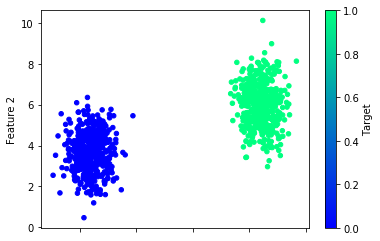

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add out first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 316us/sample - loss: 0.6068 - acc: 0.7520
Epoch 2/100
750/750 [==============================] - 0s 46us/sample - loss: 0.5965 - acc: 0.7667
Epoch 3/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5858 - acc: 0.7800
Epoch 4/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5749 - acc: 0.7920
Epoch 5/100
750/750 [==============================] - 0s 40us/sample - loss: 0.5641 - acc: 0.8053
Epoch 6/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5531 - acc: 0.8173
Epoch 7/100
750/750 [==============================] - 0s 43us/sample - loss: 0.5421 - acc: 0.8200
Epoch 8/100
750/750 [==============================] - 0s 37us/sample - loss: 0.5312 - acc: 0.8240
Epoch 9/100
750/750 [==============================] - 0s 45us/sample - loss: 0.5201 - acc: 0.8387
Epoch 10/100
750/750 [==============================] - 0s 36us/sample - loss: 0.5092 - acc: 0.8493
Epoch 11

750/750 [==============================] - 0s 40us/sample - loss: 0.1037 - acc: 0.9987
Epoch 84/100
750/750 [==============================] - 0s 39us/sample - loss: 0.1018 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 37us/sample - loss: 0.1000 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 38us/sample - loss: 0.0982 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 34us/sample - loss: 0.0964 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 36us/sample - loss: 0.0947 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 37us/sample - loss: 0.0930 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 35us/sample - loss: 0.0914 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 36us/sample - loss: 0.0898 - acc: 1.0000
Epoch 92/100
750/750 [==============================] - 0s 37us/sample - loss: 0.0883 - acc: 1.0000
Epoch 93/100


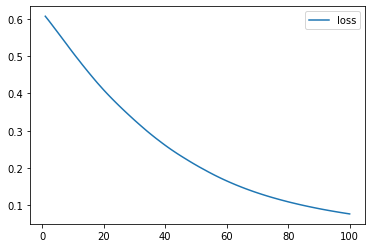

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

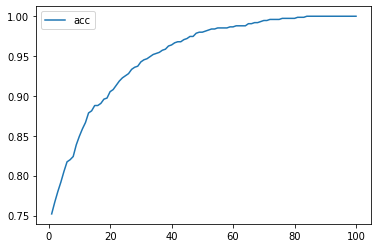

In [12]:
# Plot the accuracy
history_df.plot(y="acc")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy:{model_accuracy}")

250/250 - 0s - loss: 0.0717 - acc: 1.0000
Loss:0.07168564033508301, Accuracy:1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [23]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
df


# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 49us/sample - loss: 1.2196 - acc: 0.4253
Epoch 2/100
750/750 [==============================] - 0s 46us/sample - loss: 1.0339 - acc: 0.4613
Epoch 3/100
750/750 [==============================] - 0s 45us/sample - loss: 0.9206 - acc: 0.4973
Epoch 4/100
750/750 [==============================] - 0s 39us/sample - loss: 0.8474 - acc: 0.5160
Epoch 5/100
750/750 [==============================] - 0s 42us/sample - loss: 0.7933 - acc: 0.5507
Epoch 6/100
750/750 [==============================] - 0s 49us/sample - loss: 0.7518 - acc: 0.5680
Epoch 7/100
750/750 [==============================] - 0s 44us/sample - loss: 0.7164 - acc: 0.5853
Epoch 8/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6863 - acc: 0.5947
Epoch 9/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6592 - acc: 0.6053
Epoch 10/100
750/750 [==============================] - 0s 56us/sample - loss: 0.6351 - acc: 0.6187
Epoch 11/

750/750 [==============================] - 0s 46us/sample - loss: 0.2690 - acc: 0.8933
Epoch 84/100
750/750 [==============================] - 0s 54us/sample - loss: 0.2685 - acc: 0.8933
Epoch 85/100
750/750 [==============================] - 0s 54us/sample - loss: 0.2679 - acc: 0.8933
Epoch 86/100
750/750 [==============================] - 0s 46us/sample - loss: 0.2675 - acc: 0.8933
Epoch 87/100
750/750 [==============================] - 0s 46us/sample - loss: 0.2671 - acc: 0.8933
Epoch 88/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2666 - acc: 0.8933
Epoch 89/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2661 - acc: 0.8933
Epoch 90/100
750/750 [==============================] - 0s 51us/sample - loss: 0.2657 - acc: 0.8933
Epoch 91/100
750/750 [==============================] - 0s 52us/sample - loss: 0.2654 - acc: 0.8933
Epoch 92/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2650 - acc: 0.8933
Epoch 93/100


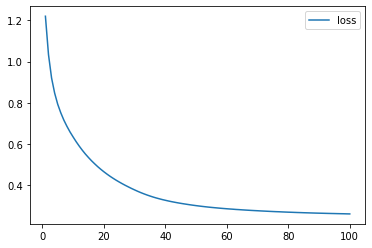

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

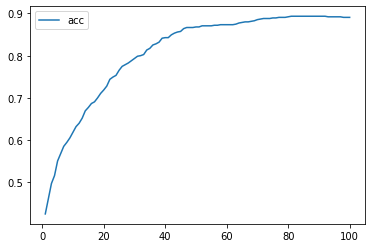

In [19]:
# Plot the loss
history_df.plot(y="acc")

In [20]:
# Generate out new Sequntial model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model togather and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 140us/sample - loss: 0.6112 - acc: 0.5440
Epoch 2/100
750/750 [==============================] - 0s 46us/sample - loss: 0.5857 - acc: 0.5680
Epoch 3/100
750/750 [==============================] - 0s 44us/sample - loss: 0.5624 - acc: 0.6400
Epoch 4/100
750/750 [==============================] - 0s 47us/sample - loss: 0.5414 - acc: 0.7453
Epoch 5/100
750/750 [==============================] - 0s 49us/sample - loss: 0.5224 - acc: 0.8627
Epoch 6/100
750/750 [==============================] - 0s 49us/sample - loss: 0.5052 - acc: 0.8693
Epoch 7/100
750/750 [==============================] - 0s 40us/sample - loss: 0.4896 - acc: 0.8693
Epoch 8/100
750/750 [==============================] - 0s 45us/sample - loss: 0.4754 - acc: 0.8707
Epoch 9/100
750/750 [==============================] - 0s 53us/sample - loss: 0.4627 - acc: 0.8707
Epoch 10/100
750/750 [==============================] - 0s 54us/sample - loss: 0.4519 - acc: 0.8707
Epoch 11

750/750 [==============================] - 0s 57us/sample - loss: 0.2379 - acc: 0.8973
Epoch 84/100
750/750 [==============================] - 0s 57us/sample - loss: 0.2376 - acc: 0.8973
Epoch 85/100
750/750 [==============================] - 0s 52us/sample - loss: 0.2374 - acc: 0.8973
Epoch 86/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2371 - acc: 0.8973
Epoch 87/100
750/750 [==============================] - 0s 42us/sample - loss: 0.2369 - acc: 0.8973
Epoch 88/100
750/750 [==============================] - 0s 42us/sample - loss: 0.2366 - acc: 0.8973
Epoch 89/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2363 - acc: 0.8973
Epoch 90/100
750/750 [==============================] - 0s 45us/sample - loss: 0.2361 - acc: 0.8973
Epoch 91/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2358 - acc: 0.8973
Epoch 92/100
750/750 [==============================] - 0s 43us/sample - loss: 0.2356 - acc: 0.8973
Epoch 93/100
